In [22]:
import random
import numpy
import sys
import copy


class Cube:
    matrix = []

    def __init__(self, *args):
        if args.__len__() == 2:
            rows = args[0]
            columns = args[1]
            self.matrix = [[0 for x in range(columns)] for x in range(rows)]
            for i in range(rows):
                for j in range(columns):
                    self.matrix[i][j] = random.randint(0, 255)
        elif args.__len__() == 1:
            if type(args[0]) is list:
                self.matrix = copy.deepcopy(args[0])
            else:
                self.matrix = copy.deepcopy(args[0].matrix)
        else:
            sys.exit('Too few arguments given to Cube constructor.')

    def print_cube(self):
        for i in range(self.matrix.__len__()):
            for j in range(self.matrix[0].__len__()):
                if self.matrix[i][j] < 100:
                    print('0', end="")
                if self.matrix[i][j] < 10:
                    print('0', end="")

                print(str(self.matrix[i][j]) + " ", end="")
            print()

    def rotate_clockwise(self):
        self.matrix = numpy.rot90(self.matrix, -1)

    def rotate_anti_clockwise(self):
        self.matrix = numpy.rot90(self.matrix, 1)

    def rotate_column(self, column, times):
        self.matrix = numpy.transpose(self.matrix)
        numpy.roll(self.matrix[column], times)
        self.matrix = numpy.transpose(self.matrix)

    def rotate_row(self, row, times):
        self.matrix[row] = numpy.roll(self.matrix[row], times)

In [23]:
from enum import Enum
import random


class Move(Enum):
    rotation_row = 1
    rotation_column = 2
    rotation_clockwise = 3
    rotation_anti_clockwise = 4


class Movement:
    type = None
    times = 0
    row_or_column = 0

    def __init__(self, rows, columns):
        self.type = random.choice(list(Move))
        if self.type == Move.rotation_column:
            self.times = random.randint(1, columns-1)
            self.row_or_column = random.randint(0, columns-1)
        elif self.type == Move.rotation_row:
                self.times = random.randint(1, rows-1)
                self.row_or_column = random.randint(0, rows-1)

In [24]:
def encrypt(cube, moves):
    for rotation in moves:
        if rotation.type == Move.rotation_row:
            cube.rotate_row(rotation.row_or_column, rotation.times)
        elif rotation.type == Move.rotation_column:
            cube.rotate_column(rotation.row_or_column, rotation.times)
        elif rotation.type == Move.rotation_clockwise:
            cube.rotate_clockwise()
        elif rotation.type == Move.rotation_anti_clockwise:
            cube.rotate_anti_clockwise()


def decrypt(cube, moves):
    for rotation in reversed(moves):
        if rotation.type == Move.rotation_row:
            cube.rotate_row(rotation.row_or_column, cube.matrix.__len__() - rotation.times)
        elif rotation.type == Move.rotation_column:
            cube.rotate_column(rotation.row_or_column, cube.matrix[0].__len__() - rotation.times)
        elif rotation.type == Move.rotation_clockwise:
            cube.rotate_anti_clockwise()
        elif rotation.type == Move.rotation_anti_clockwise:
            cube.rotate_clockwise()

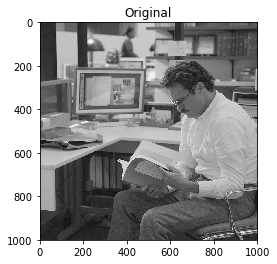

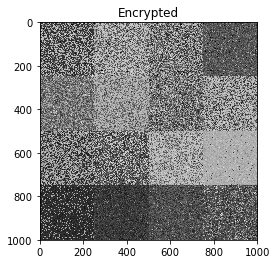

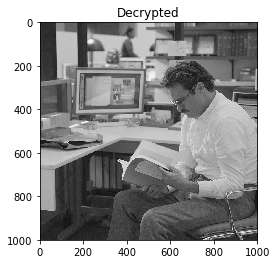

In [27]:
import numpy
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request
#url = urllib.request.urlretrieve("http://i.imgur.com/v0cB99O.jpg", "v0cB99O.jpg")
img = misc.imread("C:\\Users\\Subham\\Desktop\\v0cB99O.jpg", flatten=True)[0:1000, 0:1000]
img = misc.imread(url[0], flatten=True)[0:1000, 0:1000]

increment = 250

moves = []
for i in range(10000):
    moves.append(Movement(increment, increment))

iterations = range(0, 1000, increment)

encrypted_image = numpy.array([x[:] for x in [[0] * 1000] * 1000])
decrypted_image = numpy.array([x[:] for x in [[0] * 1000] * 1000])

for X in iterations:
    for Y in iterations:
        cube = Cube(list(img[X:X + increment, Y:Y + increment]))
        encrypt(cube, moves)
        encrypted_image[X:X + increment, Y:Y + increment] = cube.matrix
        decrypt(cube, moves)
        decrypted_image[X:X + increment, Y:Y + increment] = cube.matrix

img = img.astype(numpy.uint16)
encrypted_image = encrypted_image.astype(numpy.uint16)
decrypted_image = decrypted_image.astype(numpy.uint16)

# Assert that the dimensions of original and decrypted are equal
assert img.__len__() == decrypted_image.__len__()
assert img.__len__() == decrypted_image[0].__len__()

# Assert that each pixel in original and decrypted are the same
dimensions = [img.__len__(), img[0].__len__()]
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        assert img[i][j] == decrypted_image[i][j]

# Plot all three figures showing the original, encrypted, and decrypted
f1 = plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Original")

f2 = plt.figure()
plt.imshow(encrypted_image, cmap='gray')
plt.title("Encrypted")

f3 = plt.figure()
plt.imshow(decrypted_image, cmap='gray')
plt.title("Decrypted")

plt.show()